## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [2]:
import os
import keras
import itertools
# Disable GPU
#os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [3]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [5]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
"""Code Here
建立你的神經網路

"""
from keras.layers import Dropout

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], drop_ratio=0.2):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drop_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drop_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [7]:
"""Code Here
設定超參數
"""

LEARNING_RATE = 1e-3
EPOCHS = 10
BATCH_SIZE = 256
#OMENTUM=0.95

#建立實驗組合

Dropout_EXP=[0.1, 0.2, 0.4]  #忽略 x% 的connection
LAYER_NEURONS = [[128, 128, 128], [128, 256, 256], [128, 256, 512]]

In [8]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄


以迴圈方式遍歷組合來訓練模型
"""
    
for i, (layer_neurons, drop_rate) in enumerate(itertools.product(LAYER_NEURONS, Dropout_EXP)):
    print("Numbers of exp: %i, layer: %s, dropout_rate: %.2f" % (i, layer_neurons, drop_rate))
    model = build_mlp(input_shape=x_train.shape[1:],num_neurons=layer_neurons, drop_ratio=drop_rate)
    model.summary()

    optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
    model.compile(loss="categorical_crossentropy", metrics=["acc"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    exp_name_tag = ("exp-%s" % (i))
    results[exp_name_tag] = {'train-loss' : model.history.history["loss"],
                             'valid-loss' : model.history.history["val_loss"],
                             'train-acc' : model.history.history["acc"],
                             'valid-acc' : model.history.history["val_acc"]}

Numbers of exp: 0, layer: [128, 128, 128], dropout_rate: 0.10
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 128)               393344    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 128)               16512     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               16512     
_______________________________________________________________

50000/50000 [==============================] - 2s 35us/step - loss: 2.0628 - acc: 0.2074 - val_loss: 2.0387 - val_acc: 0.2256
Epoch 8/10
50000/50000 [==============================] - 2s 36us/step - loss: 2.0530 - acc: 0.2109 - val_loss: 2.0096 - val_acc: 0.2437
Epoch 9/10
50000/50000 [==============================] - 2s 35us/step - loss: 2.0451 - acc: 0.2150 - val_loss: 2.0466 - val_acc: 0.2335
Epoch 10/10
50000/50000 [==============================] - 2s 35us/step - loss: 2.0488 - acc: 0.2127 - val_loss: 2.0330 - val_acc: 0.2191
Numbers of exp: 3, layer: [128, 256, 256], dropout_rate: 0.10
Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 128)               393344    
_____________________________________________________

50000/50000 [==============================] - 2s 37us/step - loss: 2.1244 - acc: 0.1787 - val_loss: 2.0562 - val_acc: 0.2301
Epoch 4/10
50000/50000 [==============================] - 2s 36us/step - loss: 2.1177 - acc: 0.1867 - val_loss: 2.0690 - val_acc: 0.2031
Epoch 5/10
50000/50000 [==============================] - 2s 36us/step - loss: 2.1082 - acc: 0.1855 - val_loss: 2.0718 - val_acc: 0.2224
Epoch 6/10
50000/50000 [==============================] - 2s 36us/step - loss: 2.1026 - acc: 0.1918 - val_loss: 2.0497 - val_acc: 0.2383
Epoch 7/10
50000/50000 [==============================] - 2s 36us/step - loss: 2.0994 - acc: 0.1925 - val_loss: 2.0458 - val_acc: 0.2175
Epoch 8/10
50000/50000 [==============================] - 2s 36us/step - loss: 2.0940 - acc: 0.1969 - val_loss: 2.0586 - val_acc: 0.2295
Epoch 9/10
50000/50000 [==============================] - 2s 36us/step - loss: 2.0956 - acc: 0.1922 - val_loss: 2.0140 - val_acc: 0.2324
Epoch 10/10
50000/50000 [===========================

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 2s 42us/step - loss: 2.1180 - acc: 0.1945 - val_loss: 1.9439 - val_acc: 0.2934
Epoch 2/10
50000/50000 [==============================] - 2s 36us/step - loss: 2.0268 - acc: 0.2305 - val_loss: 1.9606 - val_acc: 0.2851
Epoch 3/10
50000/50000 [==============================] - 2s 36us/step - loss: 1.9884 - acc: 0.2488 - val_loss: 1.9223 - val_acc: 0.3087
Epoch 4/10
50000/50000 [==============================] - 2s 36us/step - loss: 1.9633 - acc: 0.2599 - val_loss: 1.9029 - val_acc: 0.3136
Epoch 5/10
50000/50000 [==============================] - 2s 36us/step - loss: 1.9476 - acc: 0.2666 - val_loss: 1.9007 - val_acc: 0.3177
Epoch 6/10
50000/50000 [==============================] - 2s 36us/step - loss: 1.9335 - acc: 0.2778 - val_loss: 1.9133 - val_acc: 0.2927
Epoch 7/10
50000/50000 [==============================] - 2s 36us/step - loss: 1.9324 - acc: 0.2738 - val_loss: 1.8652 - val_acc

In [10]:
len(results.keys())

9

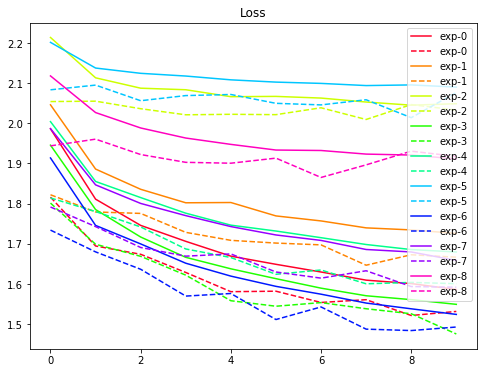

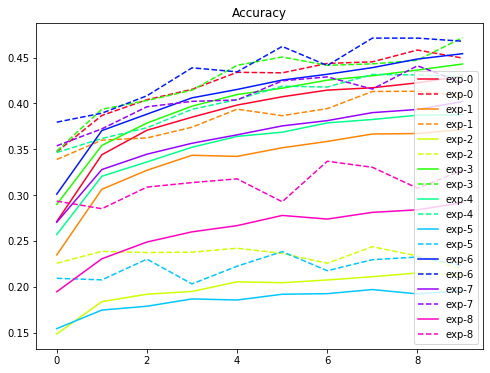

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""

import matplotlib.cm as mplcm
import matplotlib.colors as colors
%matplotlib inline
NUM_COLORS = len(results.keys())  #20

cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
color_bar = [scalarMap.to_rgba(i) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])), results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()